## Импорт библиотек

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold


## Загрузка данных

In [8]:
iris_dataset = load_iris()
df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
df['species'] = pd.Categorical.from_codes(iris_dataset.target, iris_dataset.target_names)
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
print("Размер датасета:", df.shape)
print("Пропущенные значения:")
print(df.isnull().sum())


Размер датасета: (150, 5)
Пропущенные значения:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


## EDA

In [10]:
df.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
sepal width (cm),150.000000,3.057333,0.435866,2.000000,2.800000,3.000000,3.300000,4.400000
petal length (cm),150.000000,3.758000,1.765298,1.000000,1.600000,4.350000,5.100000,6.900000
petal width (cm),150.000000,1.199333,0.762238,0.100000,0.300000,1.300000,1.800000,2.500000


In [20]:
df['species'].value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

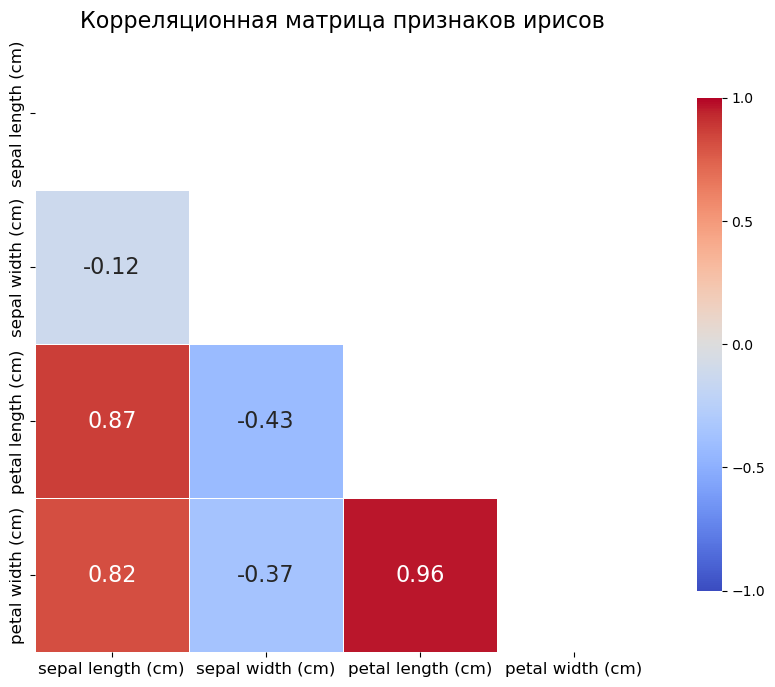

In [31]:
df_copy = df.drop(columns=['species'])

corr = df_copy.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))

sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, annot_kws={"size": 16}, 
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})

plt.title('Корреляционная матрица признаков ирисов', size=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


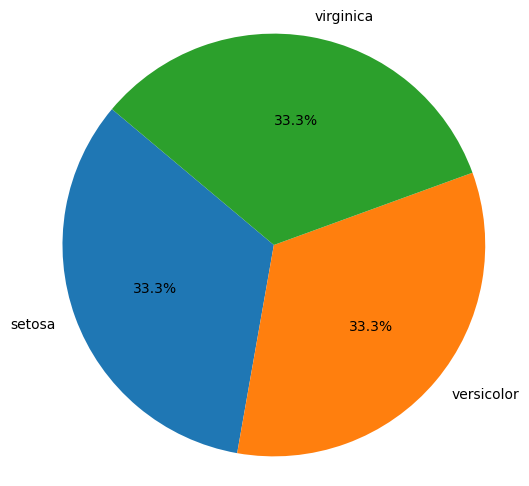

In [25]:
diagnosis_counts = df['species'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=df['species'].unique(), autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.show()


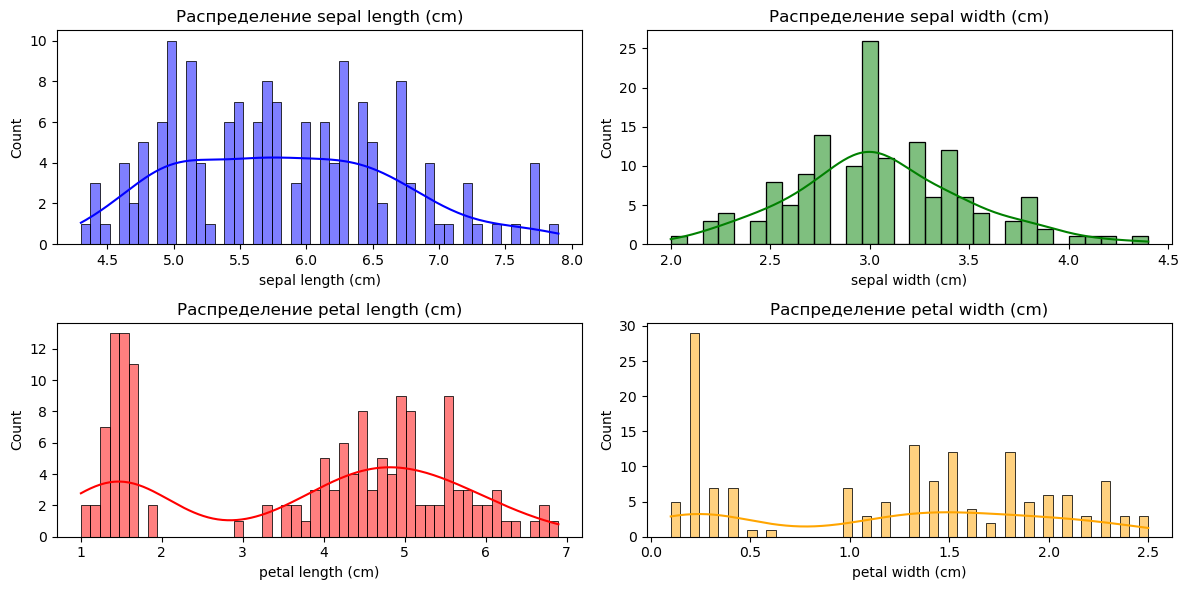

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['sepal length (cm)'], bins=50, kde=True, color='blue')
plt.title('Распределение sepal length (cm)')

plt.subplot(2, 2, 2)
sns.histplot(df['sepal width (cm)'], bins=30, kde=True, color='green')
plt.title('Распределение sepal width (cm)')

plt.subplot(2, 2, 3)
sns.histplot(df['petal length (cm)'], bins=50, kde=True, color='red')
plt.title('Распределение petal length (cm)')

plt.subplot(2, 2, 4)
sns.histplot(df['petal width (cm)'], bins=50, kde=True, color='orange')
plt.title('Распределение petal width (cm)')

plt.tight_layout()
plt.show()

## Подготовка данных к обучению

In [32]:
iris = load_iris()
X = iris.data
y = iris.target

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Обучение модели логистической регрессии без регуляризации

In [35]:
model_no_reg = LogisticRegression(penalty=None, max_iter=1000, random_state=42)
model_no_reg.fit(X_train, y_train)

train_acc_no_reg = accuracy_score(y_train, model_no_reg.predict(X_train))
test_acc_no_reg = accuracy_score(y_test, model_no_reg.predict(X_test))

print(f"Логистическая регрессия без регуляризации:")
print(f"Точность на тренировочных данных: {train_acc_no_reg:.3f}")
print(f"Точность на тестовых данных: {test_acc_no_reg:.3f}")

Логистическая регрессия без регуляризации:
Точность на тренировочных данных: 0.983
Точность на тестовых данных: 1.000


## Обучение модели логистической регрессии с добавлением L1- и L2-регуляризации

In [39]:
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_l1 = GridSearchCV(model_l1, param_grid, cv=5, scoring='accuracy')
grid_search_l1.fit(X_train, y_train)

best_param_l1 = grid_search_l1.best_params_['C']
model_l1_best = grid_search_l1.best_estimator_

train_acc_l1 = accuracy_score(y_train, model_l1_best.predict(X_train))
test_acc_l1 = accuracy_score(y_test, model_l1_best.predict(X_test))

print(f"Логистическая регрессия с L1-регуляризацией (лучшее C={best_param_l1}):")
print(f"Точность на тренировочных данных: {train_acc_l1:.3f}")
print(f"Точность на тестовых данных: {test_acc_l1:.3f}")


Логистическая регрессия с L1-регуляризацией (лучшее C=10):
Точность на тренировочных данных: 0.958
Точность на тестовых данных: 1.000


In [62]:
model_l2 = LogisticRegression(penalty='l2', max_iter=1000, random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 150]}

grid_search_l2 = GridSearchCV(model_l2, param_grid, cv=5, scoring='accuracy')
grid_search_l2.fit(X_train, y_train)

best_param_l2 = grid_search_l2.best_params_['C']
model_l2_best = grid_search_l2.best_estimator_

train_acc_l2 = accuracy_score(y_train, model_l2_best.predict(X_train))
test_acc_l2 = accuracy_score(y_test, model_l2_best.predict(X_test))

print(f"Логистическая регрессия с L2-регуляризацией (лучшее C={best_param_l2}):")
print(f"Точность на тренировочных данных: {train_acc_l2:.3f}")
print(f"Точность на тестовых данных: {test_acc_l2:.3f}")


Логистическая регрессия с L2-регуляризацией (лучшее C=100):
Точность на тренировочных данных: 0.983
Точность на тестовых данных: 1.000


* Добавление L2-регуляризации не улучшило, но и не ухудшило точность модели логистической регрессии.
* Добавление L1-регуляризации немного ухудшило точность модели логистической регрессии. 
* Вероятно, причина того, что регуляризация в данном случае оказалась бесполезной, заключается в крошечном размере дата-фрейма.

## Графики кривых обучения 

In [58]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Объем обучающей выборки")
    plt.ylabel("Точность")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Точность на тренировочной выборке")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Точность на кросс-валидации")

    plt.legend(loc="best")
    return plt
    

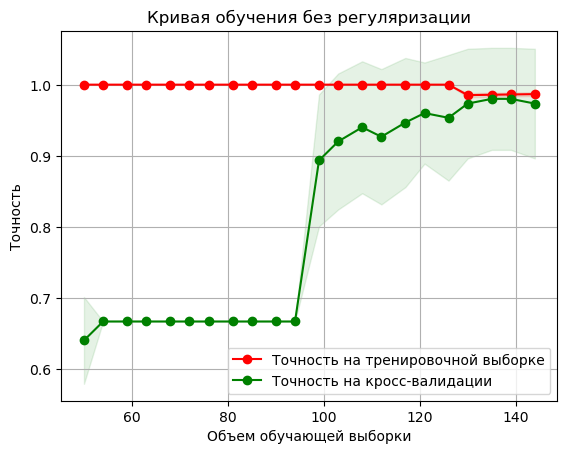

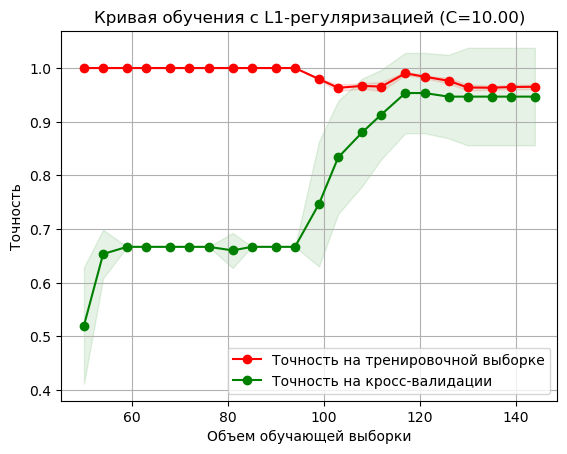

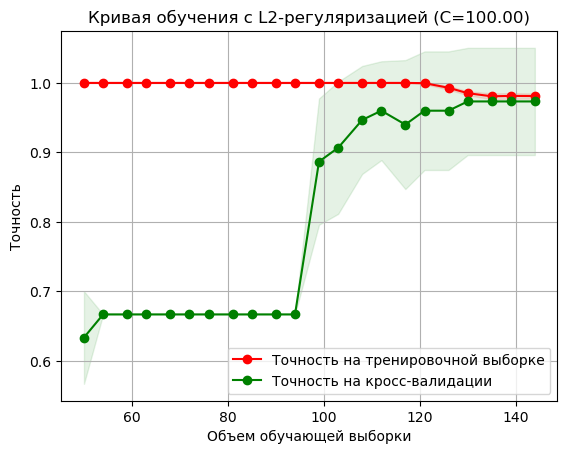

In [61]:
warnings.filterwarnings("ignore")

train_sizes = np.linspace(0.1, 1.0, 30)

title_no_reg = "Кривая обучения без регуляризации"
title_l1 = f"Кривая обучения с L1-регуляризацией (C={best_param_l1:.2f})"
title_l2 = f"Кривая обучения с L2-регуляризацией (C={best_param_l2:.2f})"

cv = StratifiedKFold(n_splits=25)

plot_learning_curve(model_no_reg, title_no_reg, X_scaled, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
plot_learning_curve(model_l1_best, title_l1, X_scaled, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
plot_learning_curve(model_l2_best, title_l2, X_scaled, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)

plt.show()


* Как мы видим, в данном случае, пока объём обучающей выборки не превысит 100 единиц, точность на тесте остаётся невысокой.
* Увеличение обучающего объёма выборки больше 130 не приносит улучшения метрики точности.
